In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn import model_selection, preprocessing, linear_model, metrics, naive_bayes, svm
from sklearn import decomposition, ensemble

from sklearn.decomposition import TruncatedSVD, PCA

import textblob, string, xgboost

from os import listdir
from os.path import isfile, join

from collections import Counter

import numpy as np

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

C:\Users\pvashisth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvashisth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
pos_path = "C:\\Users\\pvashisth\\Desktop\\ai_course\\testing\\Data\\pos"
neg_path = "C:\\Users\\pvashisth\\Desktop\\ai_course\\testing\\Data\\neg"

In [3]:

data = [] # text feature
target = [] #labels to predict ml result

In [4]:
pos_data = [] # male
neg_data = [] # female

In [5]:
for file in listdir(pos_path):
    with open(join(pos_path, file), 'r', encoding='utf-8') as r:
        d = r.read()
        data.append(d)
        target.append(1)
        
        pos_data.append(d)

In [6]:
len(data), len(target), len(pos_data)

(9762, 9762, 9762)

In [7]:
for file in listdir(neg_path):
    with open(join(neg_path, file), 'r', encoding='utf-8') as r:
        d = r.read()
        data.append(d)
        target.append(0)
        
        neg_data.append(d)

In [8]:
len(data), len(target), len(neg_data)

(21021, 21021, 11259)

In [9]:
Counter(target)

Counter({1: 9762, 0: 11259})

## Data visualisation
### SVD - Dimensionality reduction

In [10]:
svd = TruncatedSVD(n_components=2) # to plot on x/y

In [11]:
svd_vect = TfidfVectorizer(max_features=100) # no of feature 100

In [12]:
all_tokens = svd_vect.fit_transform(data)

In [13]:
svd_tokens = svd.fit_transform(all_tokens)

In [14]:
y = np.array(target)

In [15]:
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [16]:
label_names = np.array(["female", "male"])
colors = ['navy', 'darkorange']

### plotting

Text(0.5,1,'Male Femal tweets')

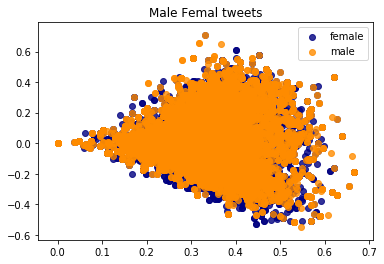

In [17]:
for color, i, target_name in zip(colors, [0,1], label_names):
    plt.scatter(svd_tokens[y == i, 0], svd_tokens[y == i, 1], color=color, alpha=.8,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Male Femal tweets')

### PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
pca_vect = TfidfVectorizer()

In [20]:
pca_tfidf_tokens = pca_vect.fit_transform(data)

In [21]:
pca_tokens = pca.fit_transform(pca_tfidf_tokens.todense())

In [ ]:
## plotting

Text(0.5,1,'Male Femal tweets')

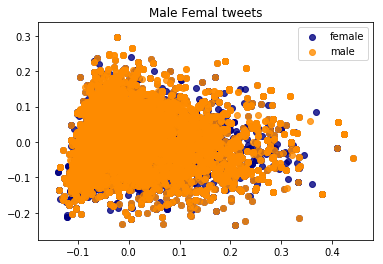

In [22]:
for color, i, target_name in zip(colors, [0,1], label_names):
    plt.scatter(pca_tokens[y == i, 0], pca_tokens[y == i, 1], color=color, alpha=.8,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Male Femal tweets')

## Word cloud to understand the words used by the male and female

In [ ]:
# Male + Female

In [23]:
word_cloud_vect = TfidfVectorizer(stop_words='english', min_df=2, max_features=1000)
word_cloud_vect.fit(data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [24]:
X = word_cloud_vect.transform(data)
X.shape

(21021, 1000)

In [25]:
# average weights for all words in vocabulary (sum of all weights / number of documents)
words_avg_weights = {}
for i in range(0, 21016):
    for vocab in word_cloud_vect.vocabulary_:
        index = word_cloud_vect.vocabulary_[vocab]

        entry = X[i, index]
        
        if vocab in words_avg_weights:
            words_avg_weights[vocab] = words_avg_weights[vocab] + entry
        else:
            words_avg_weights[vocab] = entry

# average out
for word in words_avg_weights:
    words_avg_weights[word] = words_avg_weights[word] / 21017

print(words_avg_weights)

{'amazing': 0.005371404380471266, 'new': 0.012936210695849855, 'lovely': 0.001398054154289159, 've': 0.011659437680225558, 'got': 0.009505241156017903, 'fresh': 0.0008824411384885517, 'free': 0.00537042543078308, 'waiting': 0.002352529143927969, 'like': 0.0225701284263678, 'playing': 0.0023035304136155353, 'win': 0.007039653985448132, 'way': 0.007537793481843393, 'kill': 0.0016306973877759348, 'tonight': 0.005307349181784902, 'right': 0.008528313853518972, 'episodes': 0.0009063548894091053, 'loved': 0.002690462848874387, 'getting': 0.0049998685493356275, 'tv': 0.001986687049554657, 'time': 0.014692462519705095, 'sure': 0.006314163960911835, 'girls': 0.0037645808013334597, 'say': 0.008738866832580065, 'rose': 0.0009142121717180699, 'things': 0.007226288292614076, 'saying': 0.003899772140528141, 'secret': 0.0015207611283577758, 'gonna': 0.0043906890625968085, 'wasn': 0.0026262962268329576, 'st': 0.002423672257522224, 'story': 0.0022401643650135027, 'amp': 0.02201652482953174, 'date': 0.0

In [26]:
wordcloud_tfidf = WordCloud(margin=5, max_font_size=60, width=800, height=400).generate_from_frequencies(words_avg_weights)

(-0.5, 799.5, 399.5, -0.5)

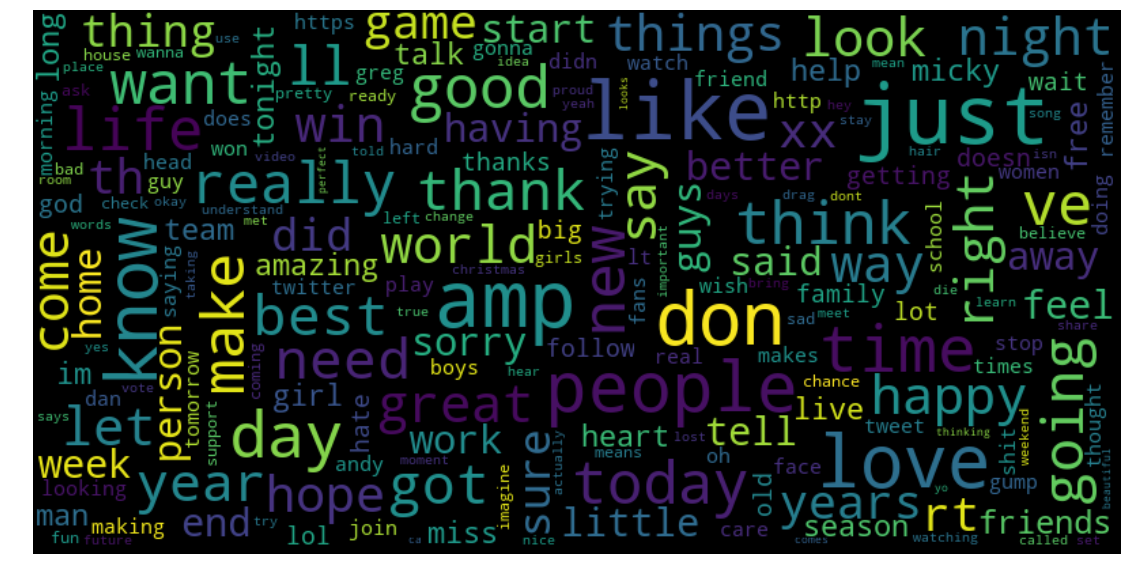

In [27]:
fig1 = plt.figure(figsize=(20,10))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis("off")

In [28]:
# Frequency distribution plot
all_words = []
stop_words = stopwords.words('english')
for d in data:
    all_words.extend([w.lower() for w in d.split() if w.lower() not in stop_words and w.isalpha()])

In [29]:
len(all_words)

187446

In [30]:
freqdist = nltk.FreqDist(all_words)

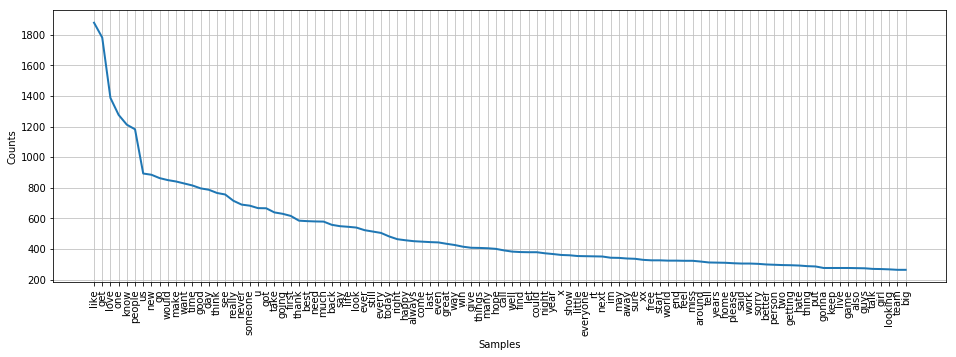

In [31]:
plt.figure(figsize=(16,5))
freqdist.plot(100)

In [ ]:
# Male words

In [32]:
word_cloud_vect_pos = TfidfVectorizer(min_df=2, max_features=1000)
word_cloud_vect_pos.fit(pos_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
X_pos = word_cloud_vect_pos.transform(pos_data)
X_pos.shape

(9762, 1000)

In [34]:
# average weights for all words in vocabulary (sum of all weights / number of documents)
words_avg_weights_pos = {}
for i in range(0, 9760):
    for vocab in word_cloud_vect_pos.vocabulary_:
        index = word_cloud_vect_pos.vocabulary_[vocab]

        entry = X[i, index]
        
        if vocab in words_avg_weights_pos:
            words_avg_weights_pos[vocab] = words_avg_weights_pos[vocab] + entry
        else:
            words_avg_weights_pos[vocab] = entry

# average out
for word in words_avg_weights_pos:
    words_avg_weights_pos[word] = words_avg_weights_pos[word] / 9761

In [35]:
wordcloud_tfidf_pos = WordCloud(margin=5, max_font_size=60, width=800, height=400).generate_from_frequencies(words_avg_weights_pos)

(-0.5, 799.5, 399.5, -0.5)

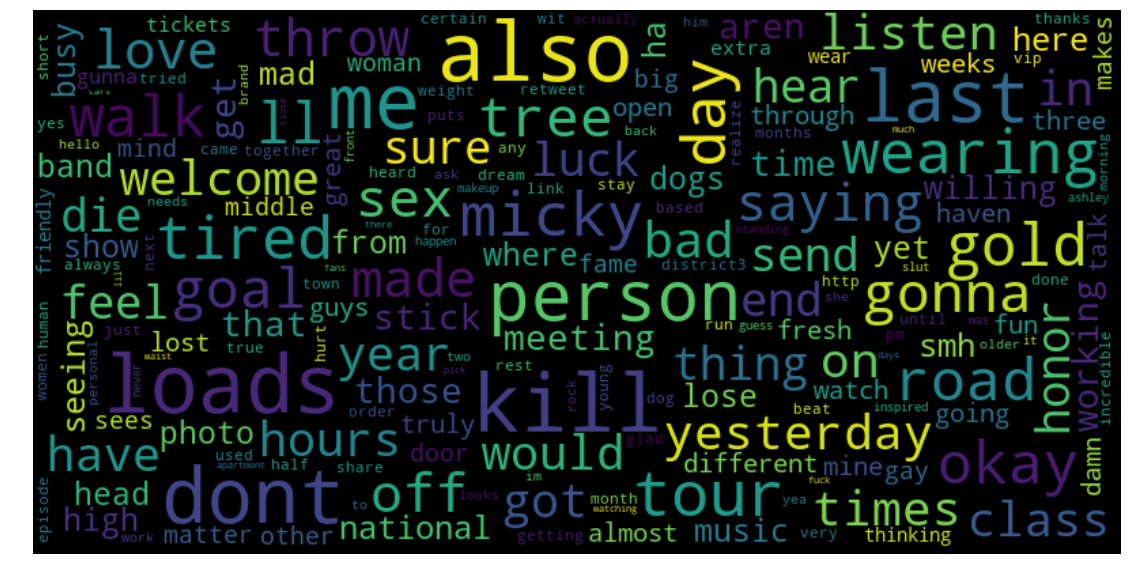

In [36]:
fig1 = plt.figure(figsize=(20,10))
plt.imshow(wordcloud_tfidf_pos, interpolation='bilinear')
plt.axis("off")

In [37]:
# Frequency distribution plot - count of all male words
all_words = []
stop_words = stopwords.words('english')
for d in pos_data:
    all_words.extend([w.lower() for w in d.split() if w.lower() not in stop_words and w.isalpha()])

In [38]:
len(all_words)

87381

In [39]:
freqdist = nltk.FreqDist(all_words)

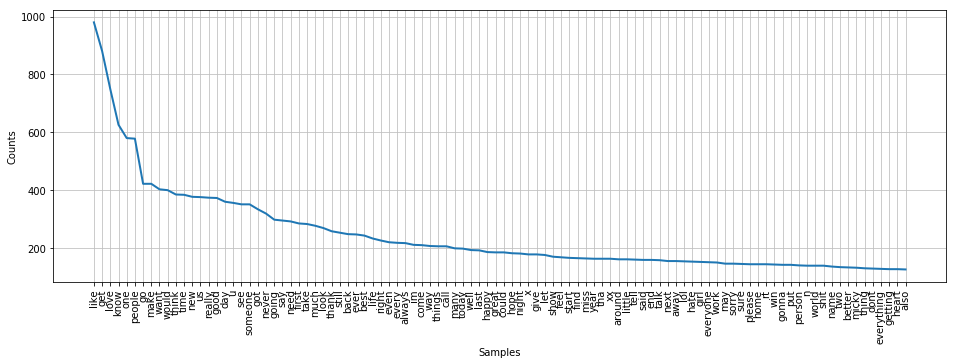

In [40]:
plt.figure(figsize=(16,5))
freqdist.plot(100)

In [ ]:
# Female words

In [41]:
word_cloud_vect_neg = TfidfVectorizer(min_df=2, max_features=1000)
word_cloud_vect_neg.fit(neg_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [43]:
X_neg = word_cloud_vect_neg.transform(neg_data)
X_neg.shape

(11259, 1000)

In [44]:
# average weights for all words in vocabulary (sum of all weights / number of documents)
words_avg_weights_neg = {}
for i in range(0, 11255):
    for vocab in word_cloud_vect_neg.vocabulary_:
        index = word_cloud_vect_neg.vocabulary_[vocab]

        entry = X[i, index]
        
        if vocab in words_avg_weights_neg:
            words_avg_weights_neg[vocab] = words_avg_weights_neg[vocab] + entry
        else:
            words_avg_weights_neg[vocab] = entry

# average out
for word in words_avg_weights_neg:
    words_avg_weights_neg[word] = words_avg_weights_neg[word] / 11256

In [45]:
wordcloud_tfidf_neg = WordCloud(margin=5, max_font_size=60, width=800, height=400).generate_from_frequencies(words_avg_weights_neg)

(-0.5, 799.5, 399.5, -0.5)

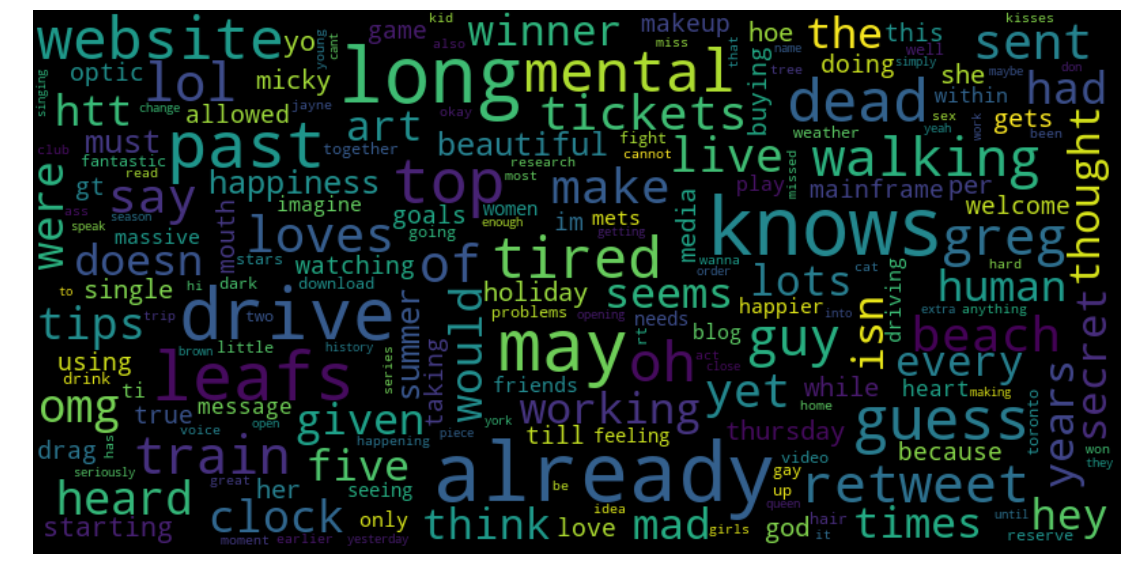

In [46]:
fig1 = plt.figure(figsize=(20,10))
plt.imshow(wordcloud_tfidf_neg, interpolation='bilinear')
plt.axis("off")

In [47]:
# Frequency distribution plot
all_words = []
stop_words = stopwords.words('english')
for d in neg_data:
    all_words.extend([w.lower() for w in d.split() if w.lower() not in stop_words and w.isalpha()])

In [48]:
len(all_words)

100065

In [49]:
freqdist = nltk.FreqDist(all_words)

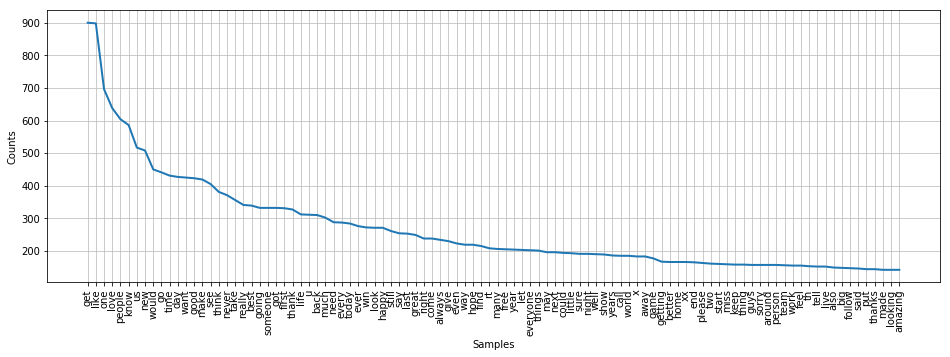

In [50]:
plt.figure(figsize=(16,5))
freqdist.plot(100)

## Machine learning

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [226]:
vect = TfidfVectorizer(max_features=100)

In [227]:
tokens = vect.fit_transform(X_train)

In [228]:
tokens.shape

(16813, 100)

In [229]:
log_model = LogisticRegression(solver='sag', max_iter=1000)

In [230]:
log_model.fit(tokens, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
test_tokens = vect.transform(X_test)

In [232]:
predictions = log_model.predict(test_tokens)

In [233]:
# precision but we have taken the accuracy measures becuase dataset is balanced
precision_recall_fscore_support(Y_test, predictions, pos_label=1, average='binary')

(0.5471698113207547, 0.3538383324860193, 0.42976227230626735, None)

In [234]:
accuracy_score(Y_test, predictions)

0.5606565176022835

## Multi Layer Perceptron (MLP) - Neural Network

In [90]:
mlp_model = MLPClassifier()

In [91]:
mlp_model.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:
predictions = mlp_model.predict(X_test)

In [93]:
precision_recall_fscore_support(Y_test, predictions, pos_label=1, average='binary')

(0.45017015070491007, 0.47076766649720386, 0.46023856858846923, None)

In [94]:
accuracy_score(Y_test, predictions)

0.483349191246432

# SVM

In [86]:
svm_model = SVC()

In [87]:
svm_model.fit(X_train, Y_train)

C:\Users\javedsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
predictions = svm_model.predict(X_test)

In [88]:
precision_recall_fscore_support(Y_test, predictions, pos_label=1, average='binary')

(0.45467907888290054, 0.47178444331469244, 0.46307385229540915, None)

In [89]:
accuracy_score(Y_test, predictions)

0.48810656517602286

In [103]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False, batch_size=32):
    # fit the training dataset on the classifier
    if is_neural_net == False:
        classifier.fit(feature_vector_train, label)
    else:
        classifier.fit(feature_vector_train, label, batch_size=batch_size)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = [int(round(p[0])) for p in predictions]
    
    return metrics.accuracy_score(Y_test, predictions)

## Naive Bayes 

In [104]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), X_train, Y_train, X_test)
print("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.5375832540437678


# Random Forest

In [105]:
# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, Y_train, X_test)
print("RF, WordLevel TF-IDF: ", accuracy)

C:\Users\javedsha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, WordLevel TF-IDF:  0.4778782112274025


## XG Boost

In [110]:
# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), X_train.tocsc(), Y_train, X_test.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

Xgb, WordLevel TF-IDF:  0.5499524262607041
